In [ ]:
#Data Science project
#  Iris Flower Classification 
# Species of Iris flowers (setosa, versicolor, virginica) as input data.
# Train a machine learning model to classify the species based on these measurements. 
# Use libraries like Scikit-learn for easy dataset access and model building.
# Evaluate the model’s accuracy and performance using test data. 
# Understand basic classification concepts in machine learning.

In [58]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import from scikit-learn library
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score, precision_score, recall_score,f1_score

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [7]:
#Loading The DataSet
df= pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#Exploration Data Analysis

#Basic Data Exploration
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.shape

(150, 6)

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
#data cleaning
if 'Id' in df.columns:
    df= df.drop('Id', axis=1)

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

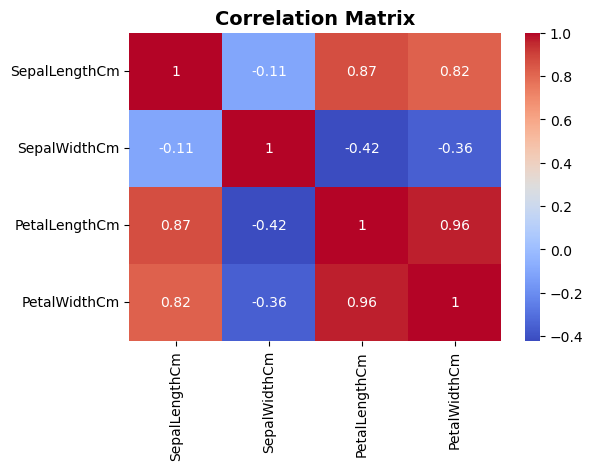

In [26]:
#Correlation Analysis
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=14, fontweight='bold')
plt.show()

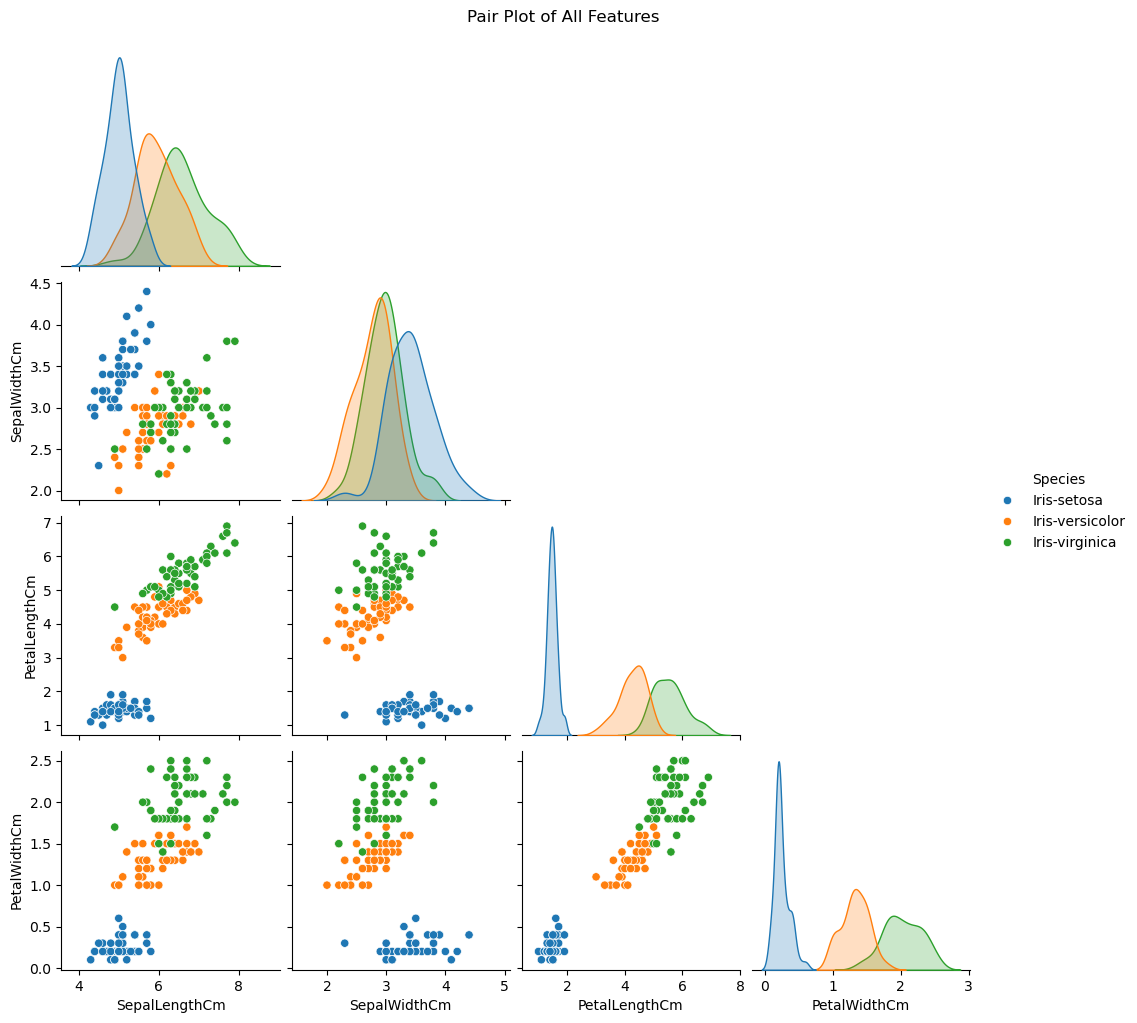

In [27]:
#Pairplot of All Features by Species
sns.pairplot(df, hue='Species', diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of All Features", y=1.02)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4092\2812437205.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="PetalWidthCm", palette=colors)


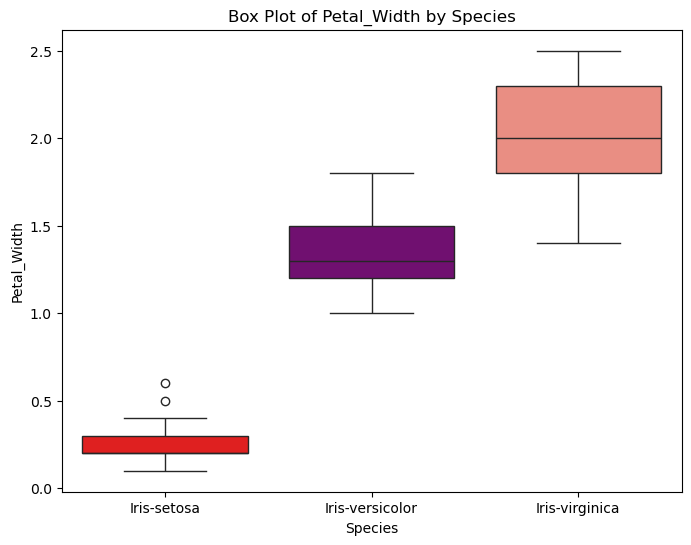

In [37]:
#features by Species

#Petal Width by Species
df["PetalWidthCm"]= df["PetalWidthCm"].astype(float)

plt.figure(figsize=(8,6))
colors = ["red", "purple", "salmon"]
sns.boxplot(data=df, x="Species", y="PetalWidthCm", palette=colors)
plt.title("Box Plot of Petal_Width by Species")
plt.xlabel("Species")
plt.ylabel("Petal_Width")
plt.show()

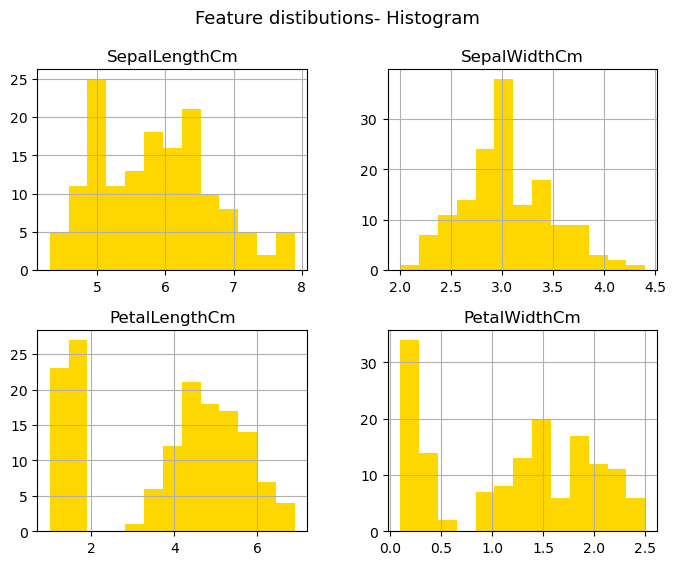

In [30]:
# Distribution of Features
df.iloc[:, :-1].hist(figsize=(8,6),bins=13, color= 'gold')
plt.suptitle("Feature distibutions- Histogram", fontsize=13)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4092\1609364010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="SepalWidthCm", palette=colors)


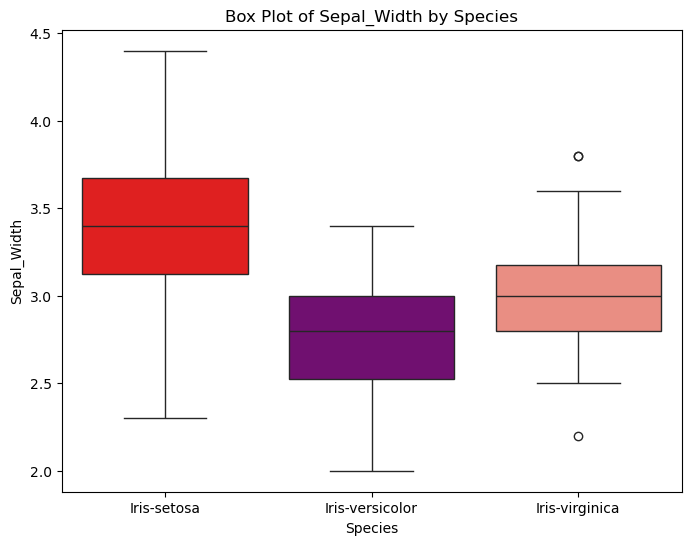

In [38]:
#Sepal Width by Species
df["SepalWidthCm"]= df["SepalWidthCm"].astype(float)
plt.figure(figsize=(8,6))
colors = ["red", "purple", "salmon"]
sns.boxplot(data=df, x="Species", y="SepalWidthCm", palette=colors)
plt.title("Box Plot of Sepal_Width by Species")
plt.xlabel("Species")
plt.ylabel("Sepal_Width")
plt.show()

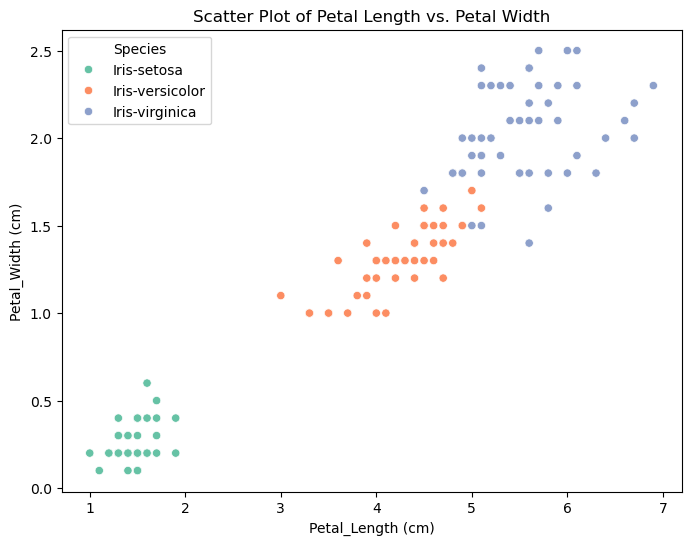

In [39]:
#Scatterplot - Petal length vs Petal Width
plt.figure(figsize=(8,6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df, palette='Set2')
plt.xlabel('Petal_Length (cm)')
plt.ylabel('Petal_Width (cm)')
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.show()

In [87]:
#Label Encoding & Train-Test Split

#Label Encode Species → convert text labels to numeric.
#Split Dataset → features (X) and target (y), then into training and testing sets.

# Label Encoding
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
print(le.classes_)  # Shows mapping (Setosa=0, Versicolor=1, Virginica=2)

# Split features & target
x = df.iloc[:, :-1]   # all features
y = df['Species']     # target

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

[0 1 2]
x_train shape: (120, 4)
x_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [53]:
#Train Multiple ML Models

#Initialize models

models={
    'KNN':KNeighborsClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'SVM':SVC(),
    'LogisticRegression':LogisticRegression(),
    'RandomForest':RandomForestClassifier()   
}

#Train & Evaluate each Models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

KNN Accuracy: 1.00
DecisionTree Accuracy: 0.97
SVM Accuracy: 0.97
LogisticRegression Accuracy: 0.97
RandomForest Accuracy: 0.93


In [67]:
# Prepare list to store metrics
results = []

# Train & evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 2),
        "Precision": round(precision_score(y_test, y_pred, average='macro'), 2),
        "Recall": round(recall_score(y_test, y_pred, average='macro'), 2),
        "F1-Score": round(f1_score(y_test, y_pred, average='macro'), 2)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,1.00,1.00,1.00,1.00
1,DecisionTree,0.93,0.93,0.93,0.93
2,SVM,0.97,0.97,0.97,0.97
3,LogisticRegression,0.97,0.97,0.97,0.97
4,RandomForest,0.97,0.97,0.97,0.97


In [72]:
best_model_name=results_df['Model'][0]
best_model=models[best_model_name]

In [73]:
print(f'Best model is :{best_model_name}')

Best model is :KNN


In [81]:
best_model.fit(x_train,y_train)
y_pred_best=best_model.predict(x_test)
cm= confusion_matrix(y_test,y_pred_best,labels=best_model.classes_)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [101]:
# Print the classification report
print("Classification Report for KNN Model:")
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))

Classification Report for KNN Model:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



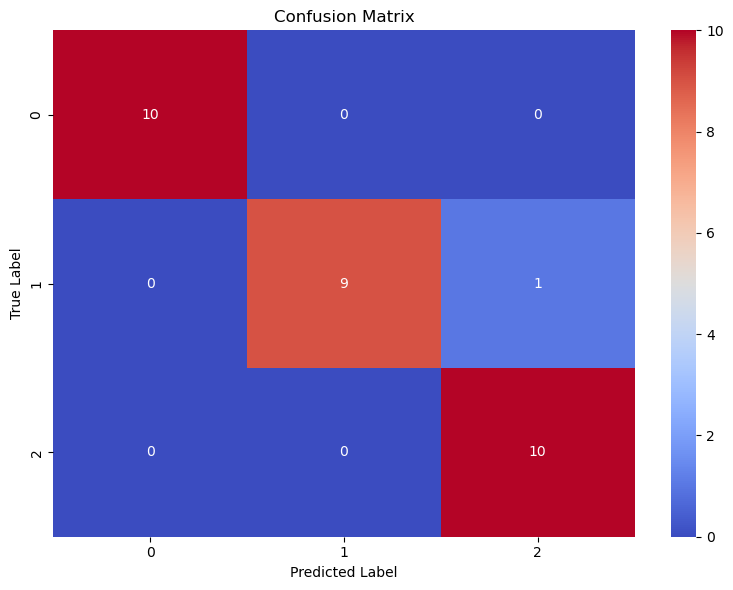

In [98]:
# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [100]:
#Final Model Validation
from sklearn.model_selection import cross_val_score

scores= cross_val_score(model, x, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV accuracy: 0.9666666666666668


In [ ]:
#Conclusion & Model Saving

#After evaluating four machine learning models (Logistic Regression, Decision Tree, KNN, and SVM), the K-Nearest Neighbors (KNN) model achieved the highest and most consistent performance.
#The cross-validation mean accuracy of 96.7% confirms the model’s stability and reliability,Therefore, the KNN algorithm is selected as the best model for classifying Iris flower species.

In [103]:
#Save the Best Model (KNN)
import joblib

# Save your trained model
joblib.dump(model, 'best_model_knn.pkl')

print("Model saved successfully as 'best_model_knn.pkl'")

Model saved successfully as 'best_model_knn.pkl'
